<a href="https://colab.research.google.com/github/U-S-Hari-Shankar/Machine-Learning/blob/main/Multivariate_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot
from sklearn import linear_model

In [2]:
# Read the 50_Startups dataset
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<ipython-input-6-a56c01a0fe83>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




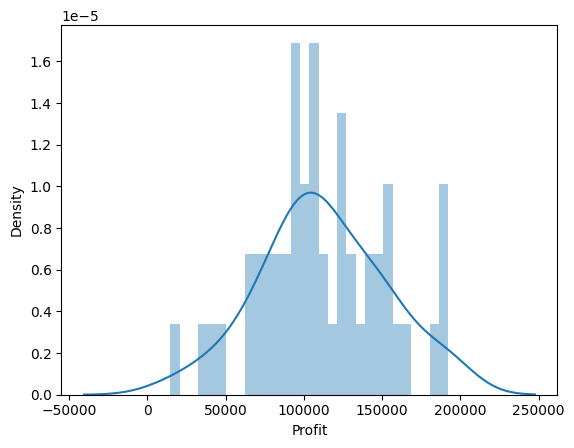

In [6]:
#Distplot on profit
sns.distplot(data['Profit'], bins=30)
plt.show()

<Axes: >

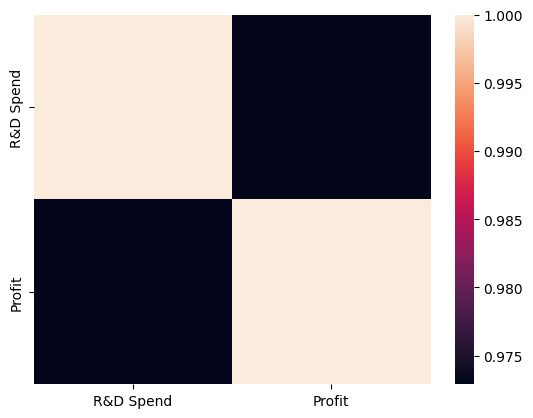

In [7]:
#Heatmap of correlation of R&D Spend & Profit
dff=data[['R&D Spend','Profit']]
sns.heatmap(dff.corr() )

<Axes: >

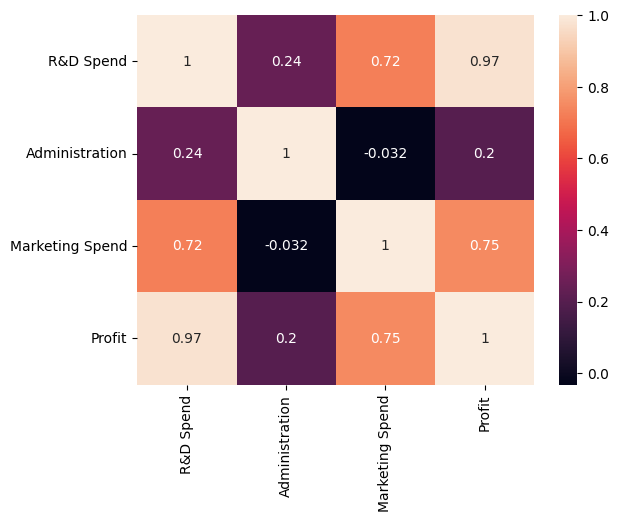

In [8]:
#Heatmap of correlation of data
df=data.corr()
sns.heatmap(df, annot=True)

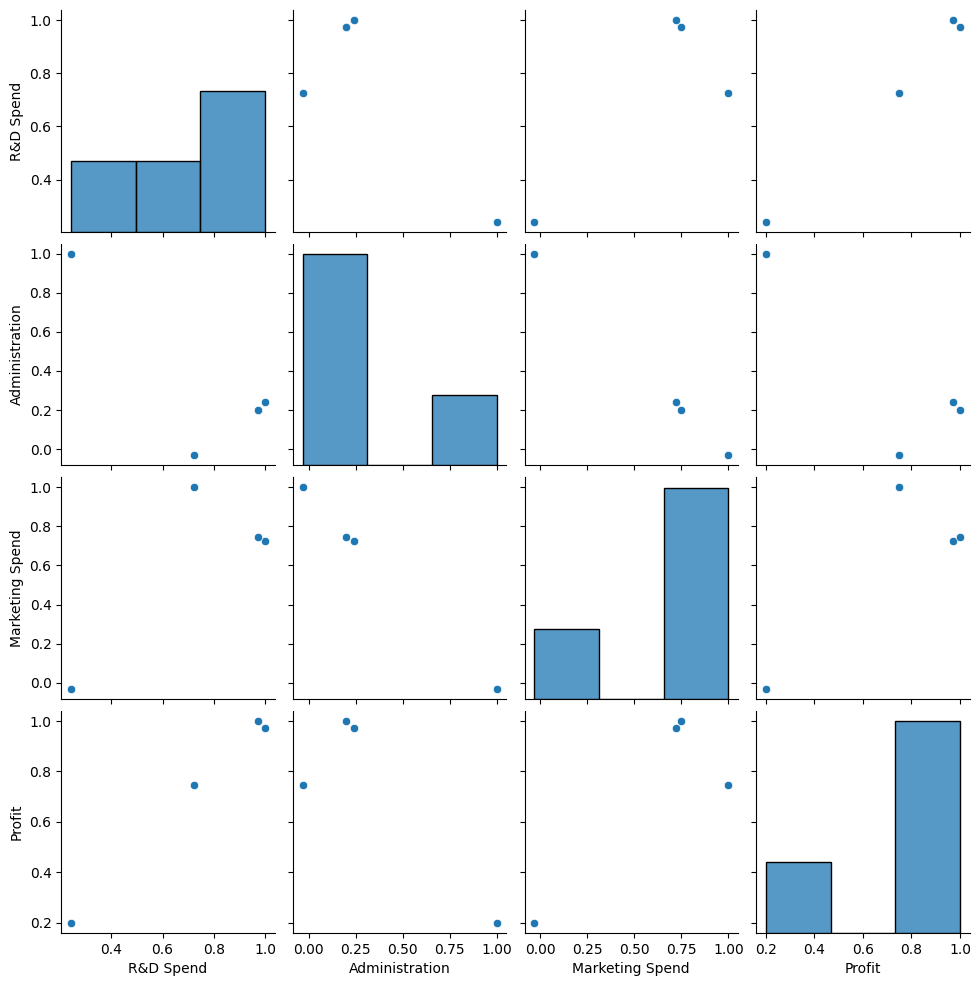

In [9]:
#pairplot of the data
sns.pairplot(df)

In [10]:
#Splitting the data into training and testing
X=data.iloc[:,1:2].values
Y=data.iloc[:,2].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y)

In [11]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
print(str(X_train))

[[ 99814.71]
 [153773.43]
 [103057.49]
 [152701.92]
 [115641.28]
 [114175.79]
 [157693.92]
 [118546.05]
 [ 82982.09]
 [122616.84]
 [136897.8 ]
 [139553.16]
 [127056.21]
 [135495.07]
 [153514.11]
 [ 96189.63]
 [127320.38]
 [118671.85]
 [156547.42]
 [145077.58]
 [115816.21]
 [108679.17]
 [113867.3 ]
 [ 51283.14]
 [145530.06]
 [116983.8 ]
 [124153.04]
 [105751.03]
 [148718.95]
 [101145.55]
 [135426.92]
 [147198.87]
 [129219.61]
 [153032.06]
 [127864.55]
 [144135.98]
 [ 91790.61]]


In [12]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8073
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.375
Time:                        09:11:26   Log-Likelihood:                -484.20
No. Observations:                  37   AIC:                             972.4
Df Residuals:                      35   BIC:                             975.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.129e+05   1.07e+05      2.913      0.006    9.48e+04    5.31e+05
x1            -0.7601      0.846     -0.898      0.375      -2.477       0.957
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.807
Skew:                          -0.095   Prob(JB):                        0.668
Kurtosis:                       2.302   Cond. No.                     6.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

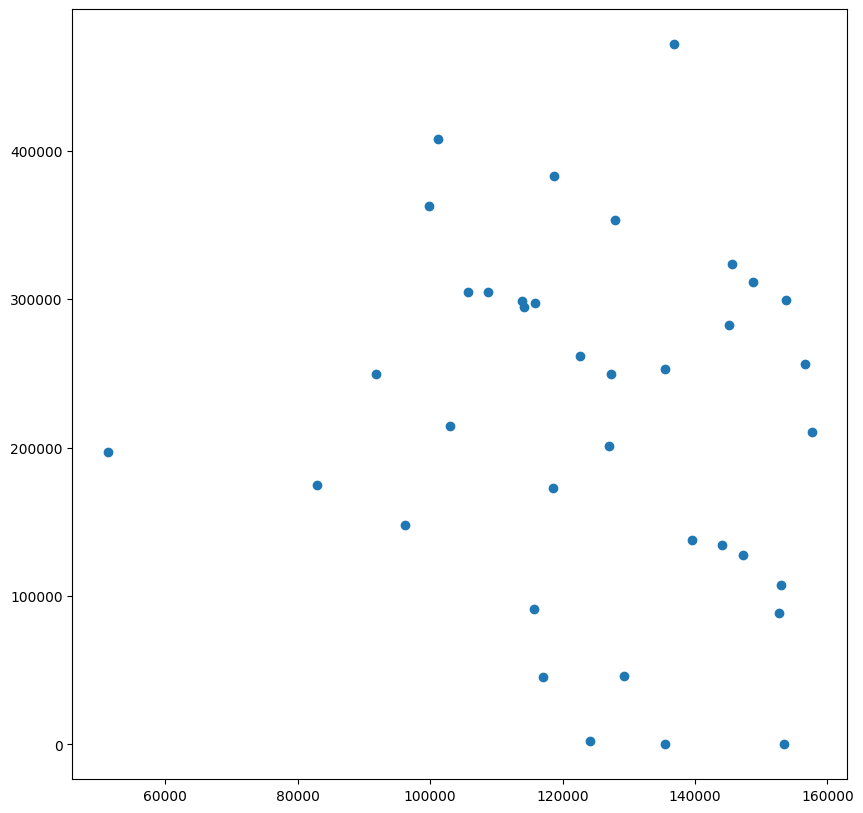

In [13]:
#Scatter plot of Training data
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(X_train,y_train)
plt.show()

In [14]:
X=data.drop('Profit',axis=1).values
y=data['Profit'].values
X=data.select_dtypes(include=np.number)
print(X)

    R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#Fitting linearRegression to the model
reg =linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
#training data error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

MAE = 1.7108332768485353e-11
MSE = 4.993488151887682e-22
RMSE = 2.2346114095939996e-11
R_2 = 1.0


In [18]:
#testing data error
y_pred2 = reg.predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

MAE = 1.9029427606325883e-11
MSE = 6.108410677314666e-22
RMSE = 2.4715199123848196e-11
R_2 = 1.0


In [19]:
#LassoRegression
from sklearn.linear_model import Lasso
reg = Lasso(alpha = 0.1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9999996929621922

In [20]:
#RidgeRegression
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.5)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

1.0